In [46]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import numpy as np
import seaborn as sns

In [3]:
df_mad = pd.read_csv('../../data/raw/data_aemet/estacion_3195_data.csv')
df_bar = pd.read_csv('../../data/raw/data_aemet/estacion_0201X_data.csv')
df_hoyo = pd.read_csv('../../data/raw/Open_Meteo/daily/Hoyo de Manzanares/estacion_ESMAD_data.csv')

In [8]:
df_bar.describe()

,altitud,hrMedia,hrMax,hrMin
count,1262.0,1255.000000,1258.000000,1258.000000
mean,11.0,65.388048,80.437202,51.311606
std,0.0,10.973435,8.059718,13.355844
min,11.0,19.000000,41.000000,3.000000
25%,11.0,59.000000,76.250000,43.000000
50%,11.0,67.000000,82.000000,52.000000
75%,11.0,73.000000,86.000000,61.000000
max,11.0,90.000000,95.000000,84.000000


In [9]:
df_bar.dtypes

fecha          object
indicativo     object
nombre         object
provincia      object
altitud         int64
tmed           object
prec           object
tmin           object
horatmin       object
tmax           object
horatmax       object
hrMedia       float64
hrMax         float64
horaHrMax      object
hrMin         float64
horaHrMin      object
dtype: object

In [15]:
df_mad["tmed"] = df_mad["tmed"].str.replace(',', '.').astype(float)
df_mad["tmin"] = df_mad["tmin"].str.replace(',', '.').astype(float)
df_mad["tmax"] = df_mad["tmax"].str.replace(',', '.').astype(float)

df_bar["tmed"] = df_bar["tmed"].str.replace(',', '.').astype(float)
df_bar["tmin"] = df_bar["tmin"].str.replace(',', '.').astype(float)
df_bar["tmax"] = df_bar["tmax"].str.replace(',', '.').astype(float)

In [16]:
df_bar["fecha"] = pd.to_datetime(df_bar["fecha"])
df_mad["fecha"] = pd.to_datetime(df_mad["fecha"])

In [34]:
df_hoyo["date"] = pd.to_datetime(df_hoyo["date"])


## Visualización de los datos de Temperatura media


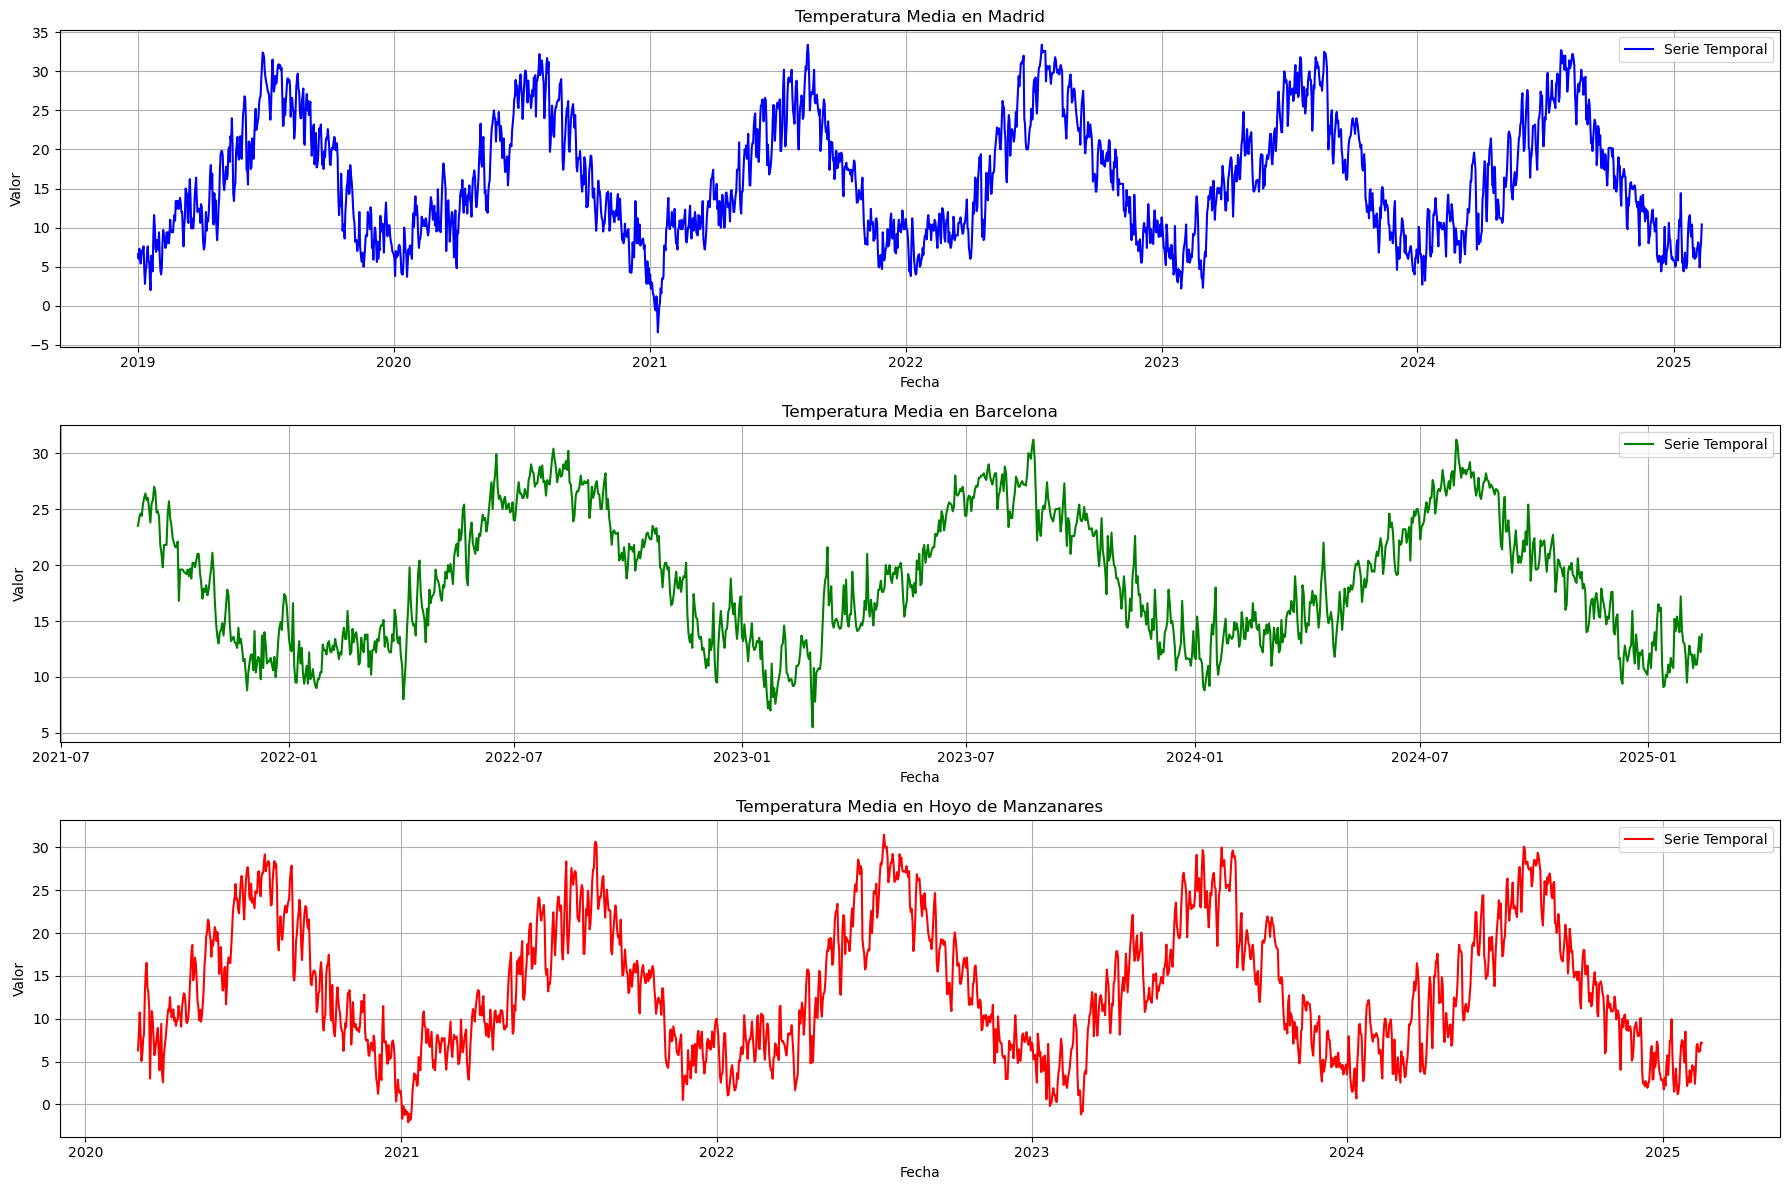

In [35]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
plt.plot(df_mad["fecha"], df_mad["tmed"], label="Serie Temporal", color="b")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Temperatura Media en Madrid")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(df_bar["fecha"], df_bar["tmed"], label="Serie Temporal", color="g")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Temperatura Media en Barcelona")
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(df_hoyo["date"], df_hoyo["temperature_2m_mean"], label="Serie Temporal", color="r")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Temperatura Media en Hoyo de Manzanares")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [11]:
print(f"Nulos en temperatura media Hoyo de Manzanares: {df_hoyo['temperature_2m_mean'].isna().sum()}")
print(f"Nulos en temperatura media Madrid: {df_mad['tmed'].isna().sum()}")
print(f"Nulos en temperatura media Barcelona: {df_bar['tmed'].isna().sum()}")
print('------------------------------------')
print(f"Nulos en temperatura maxima Hoyo de Manzanares: {df_hoyo['temperature_2m_max'].isna().sum()}")
print(f"Nulos en temperatura maxima Madrid: {df_mad['tmax'].isna().sum()}")
print(f"Nulos en temperatura maxima Barcelona: {df_bar['tmax'].isna().sum()}")
print('------------------------------------')
print(f"Nulos en temperatura minima Hoyo de Manzanares: {df_hoyo['temperature_2m_min'].isna().sum()}")
print(f"Nulos en temperatura minima Madrid: {df_mad['tmin'].isna().sum()}")
print(f"Nulos en temperatura minima Barcelona: {df_bar['tmin'].isna().sum()}")
print('------------------------------------')
print(f"Nulos en humedad relativa Hoyo de Manzanares: {df_hoyo['relative_humidity_2m'].isna().sum()}")
print(f"Nulos en humedad relativa Madrid: {df_mad['hrMedia'].isna().sum()}")
print(f"Nulos en humedad relativa Barcelona: {df_bar['hrMedia'].isna().sum()}")

Nulos en temperatura media Hoyo de Manzanares: 0
Nulos en temperatura media Madrid: 20
Nulos en temperatura media Barcelona: 4
------------------------------------
Nulos en temperatura maxima Hoyo de Manzanares: 0
Nulos en temperatura maxima Madrid: 20
Nulos en temperatura maxima Barcelona: 4
------------------------------------
Nulos en temperatura minima Hoyo de Manzanares: 0
Nulos en temperatura minima Madrid: 20
Nulos en temperatura minima Barcelona: 4
------------------------------------
Nulos en humedad relativa Hoyo de Manzanares: 0
Nulos en humedad relativa Madrid: 54
Nulos en humedad relativa Barcelona: 7


#### Para rellenar los nulos ya que son pocos vamos a usar el metodo ffill, este metodo rellena los datos faltantes con el valor del último dato


In [17]:
df_mad['tmed'] = df_mad['tmed'].ffill()
df_bar['tmed'] = df_bar['tmed'].ffill()

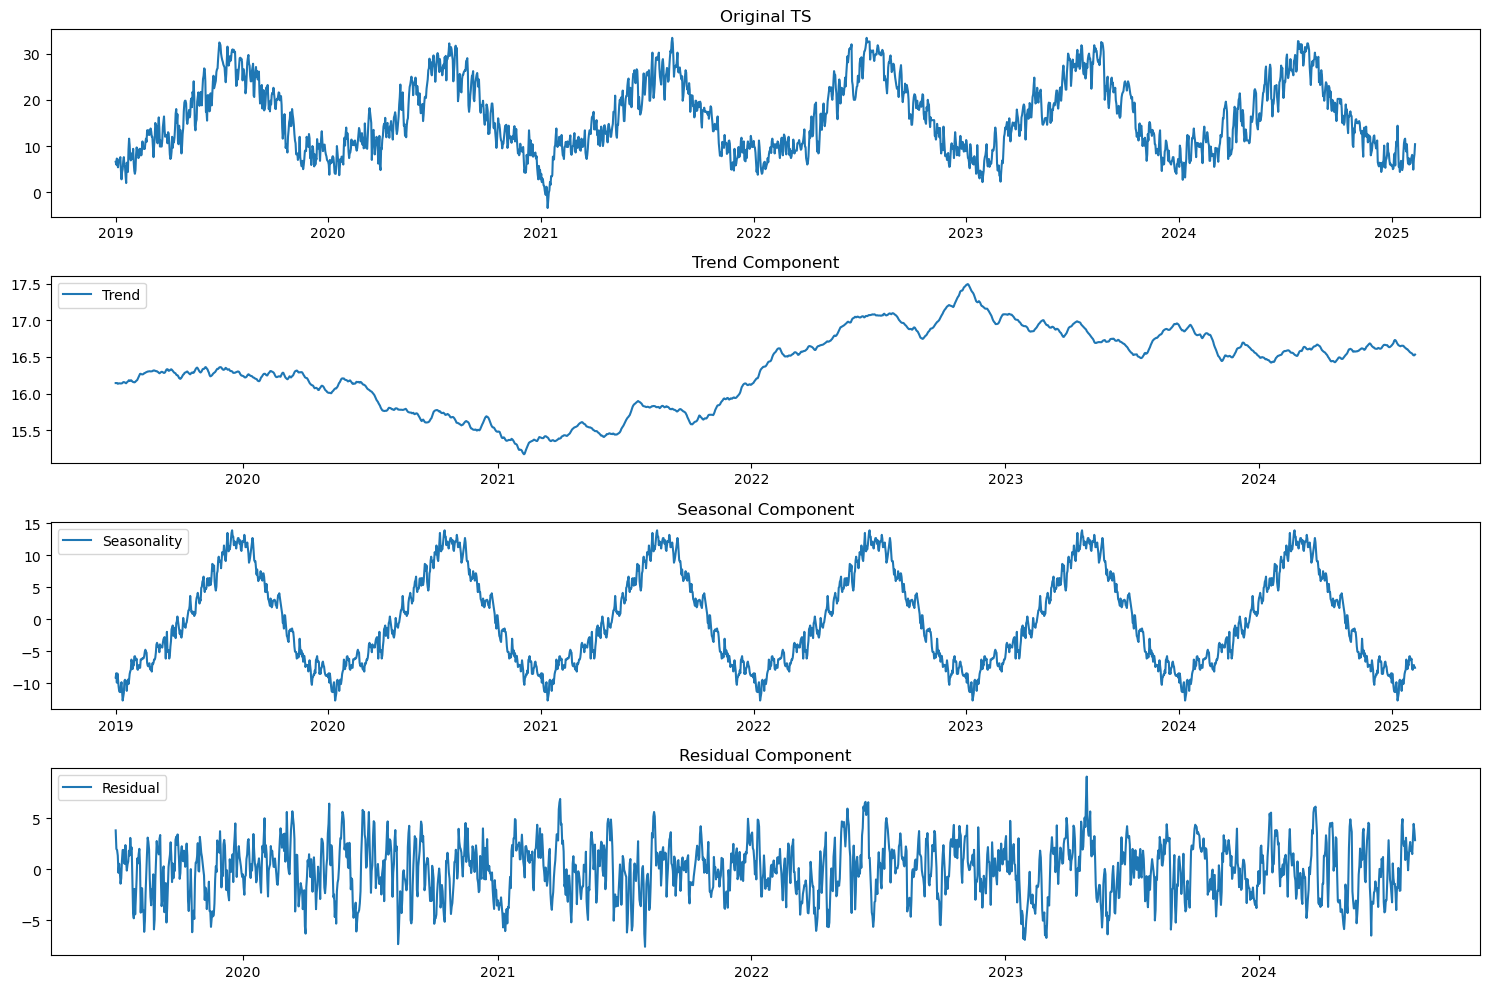

In [36]:
decomposition_air = seasonal_decompose(df_mad['tmed'], model='additive', period=365)

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(df_mad["fecha"], df_mad["tmed"])
plt.title('Original TS')

plt.subplot(4, 1, 2)
plt.plot(df_mad["fecha"], decomposition_air.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(df_mad["fecha"], decomposition_air.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(df_mad["fecha"], decomposition_air.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

### Detección de outliers

In [39]:
window = 30  # 30 days window
threshold = 3  # Threshold of 2 standard deviations

ma = df_mad["tmed"].rolling(window=window, center=True).mean()
std = df_mad["tmed"].rolling(window=window, center=True).std()

#Treshold min and max
threshold_min = ma - std*threshold 
threshold_max = ma + std*threshold 

#Outliers detection
df_mad["outlier_ma"] = (np.abs(df_mad["tmed"] - ma) > threshold * std)

In [40]:
df_mad["outlier_ma"].value_counts()

outlier_ma
False    2233
Name: count, dtype: int64

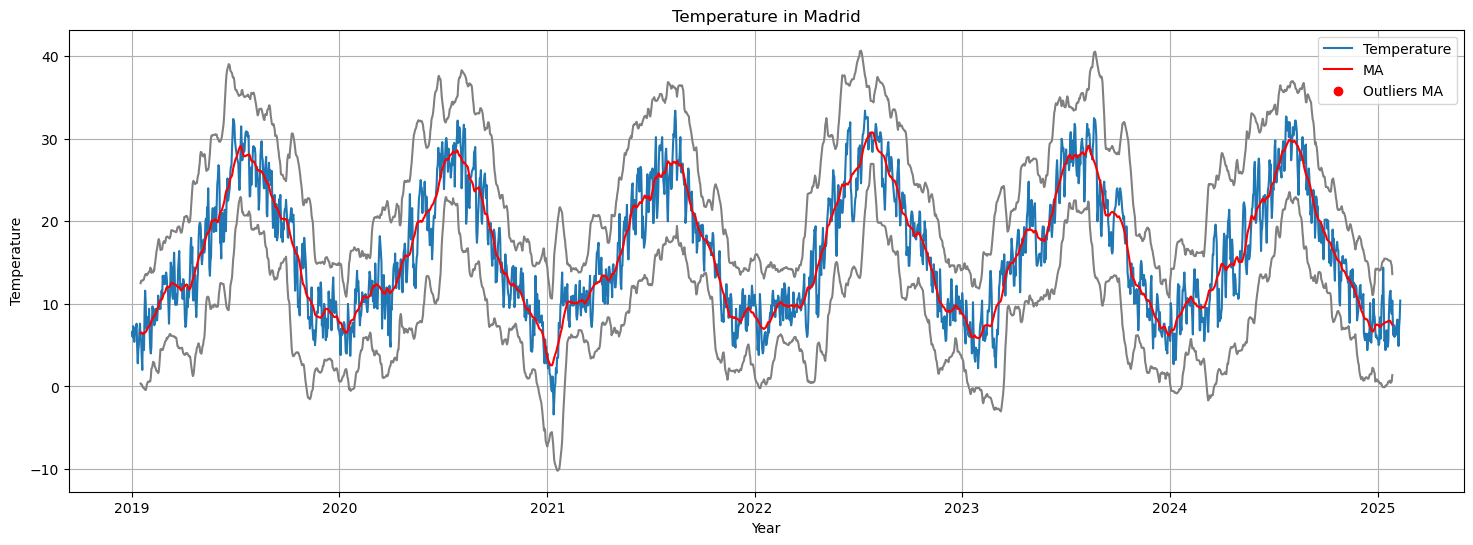

In [43]:
plt.figure(figsize=(18, 6))

plt.plot(df_mad['fecha'], df_mad['tmed'], label='Temperature')
plt.plot(df_mad['fecha'], ma, label='MA', color='red')
plt.plot(df_mad['fecha'], threshold_min, color='gray')
plt.plot(df_mad['fecha'], threshold_max, color='gray')
plt.scatter(df_mad["fecha"][df_mad["outlier_ma"]], df_mad["tmed"][df_mad["outlier_ma"]], color='red', label="Outliers MA")
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature in Madrid')
plt.legend()
plt.grid(True)
plt.show()

## Sacamos la matriz de correlación de los datos actuales de Temperatura Media con sus ultimos 3 dias y los datos del año anterior

In [45]:
df_mad['tmed_lag_1'] = df_mad['tmed'].shift(1)
df_mad['tmed_lag_2'] = df_mad['tmed'].shift(2)
df_mad['tmed_lag_3'] = df_mad['tmed'].shift(3)
df_mad['tmed_lag_365'] = df_mad['tmed'].shift(365)
df_mad['tmed_lag_366'] = df_mad['tmed'].shift(366)
df_mad['tmed_lag_367'] = df_mad['tmed'].shift(367)

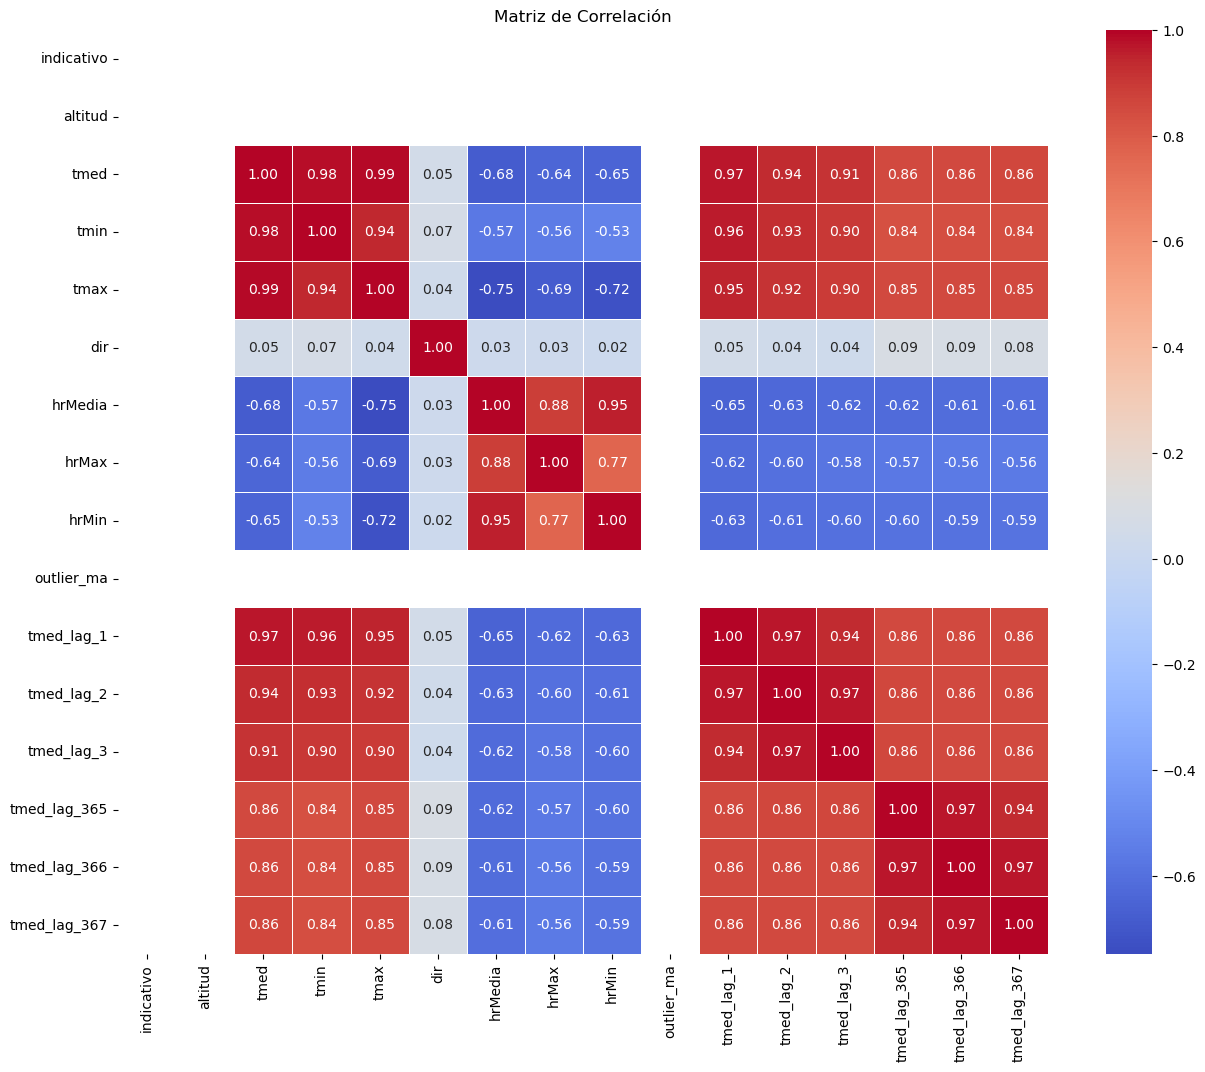

In [48]:
corr_matrix = df_mad.corr(numeric_only=True)

# Crear el mapa de calor
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')

plt.show()

### Como se puede apreciar, tanto con los datos de los 3 días anteriores como los del año pasado la variable tiene una correlación super alta, incluso demasiado alta como para que sea util


## Medimos la estacionalidad usando el test de Dickey-Fuller

In [49]:
def check_stationarity(series, name):
    result = adfuller(series)
    print(f'ADF Statistic for {name}:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("The series is likely stationary.")
    else:
        print("The series is likely non-stationary.")

In [52]:
check_stationarity(df_mad['tmed'], 'tmed')

ADF Statistic for tmed: -3.0289243788909714
p-value: 0.032280102772937525
The series is likely stationary.


In [53]:
check_stationarity(df_bar['tmed'], 'tmed')

ADF Statistic for tmed: -2.0959258404290573
p-value: 0.2461559943028755
The series is likely non-stationary.


In [54]:
check_stationarity(df_hoyo['temperature_2m_mean'], 'temperature_2m_mean')

ADF Statistic for temperature_2m_mean: -2.7860225088758583
p-value: 0.0602982581507662
The series is likely non-stationary.


## Visualización de los datos de Humedad Relativa


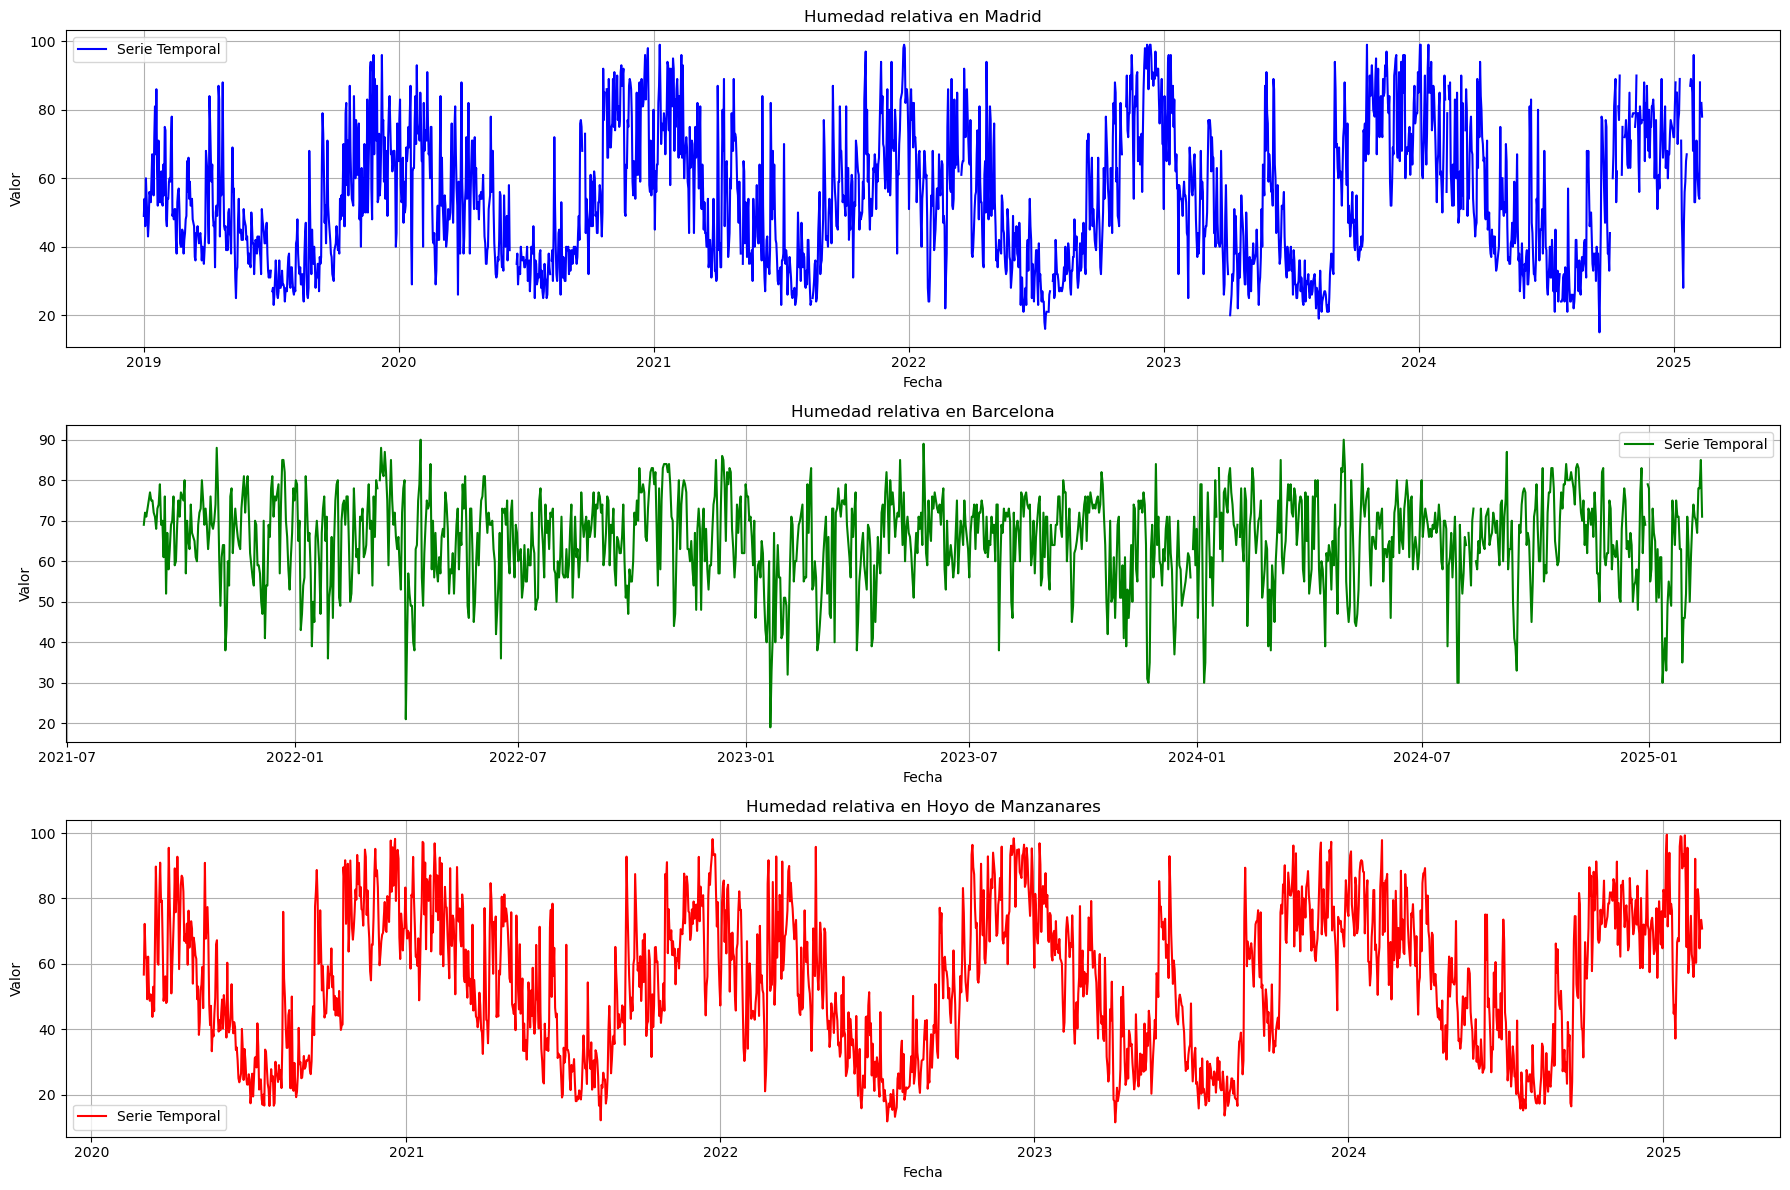

In [59]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
plt.plot(df_mad["fecha"], df_mad["hrMedia"], label="Serie Temporal", color="b")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Humedad relativa en Madrid")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(df_bar["fecha"], df_bar["hrMedia"], label="Serie Temporal", color="g")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Humedad relativa en Barcelona")
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(df_hoyo["date"], df_hoyo["relative_humidity_2m"], label="Serie Temporal", color="r")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Humedad relativa en Hoyo de Manzanares")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [63]:
print(f"Nulos en humedad relativa Hoyo de Manzanares: {df_hoyo['relative_humidity_2m'].isna().sum()}")
print(f"Nulos en humedad relativa Madrid: {df_mad['hrMedia'].isna().sum()}")
print(f"Nulos en humedad relativa Barcelona: {df_bar['hrMedia'].isna().sum()}")

Nulos en humedad relativa Hoyo de Manzanares: 0
Nulos en humedad relativa Madrid: 54
Nulos en humedad relativa Barcelona: 7


### Para rellenar los nulos ya que son pocos vamos a usar el metodo ffill, este metodo rellena los datos faltantes con el valor del último dato

In [65]:
df_mad['hrMedia'] = df_mad['hrMedia'].ffill()
df_bar['hrMedia'] = df_bar['hrMedia'].ffill()

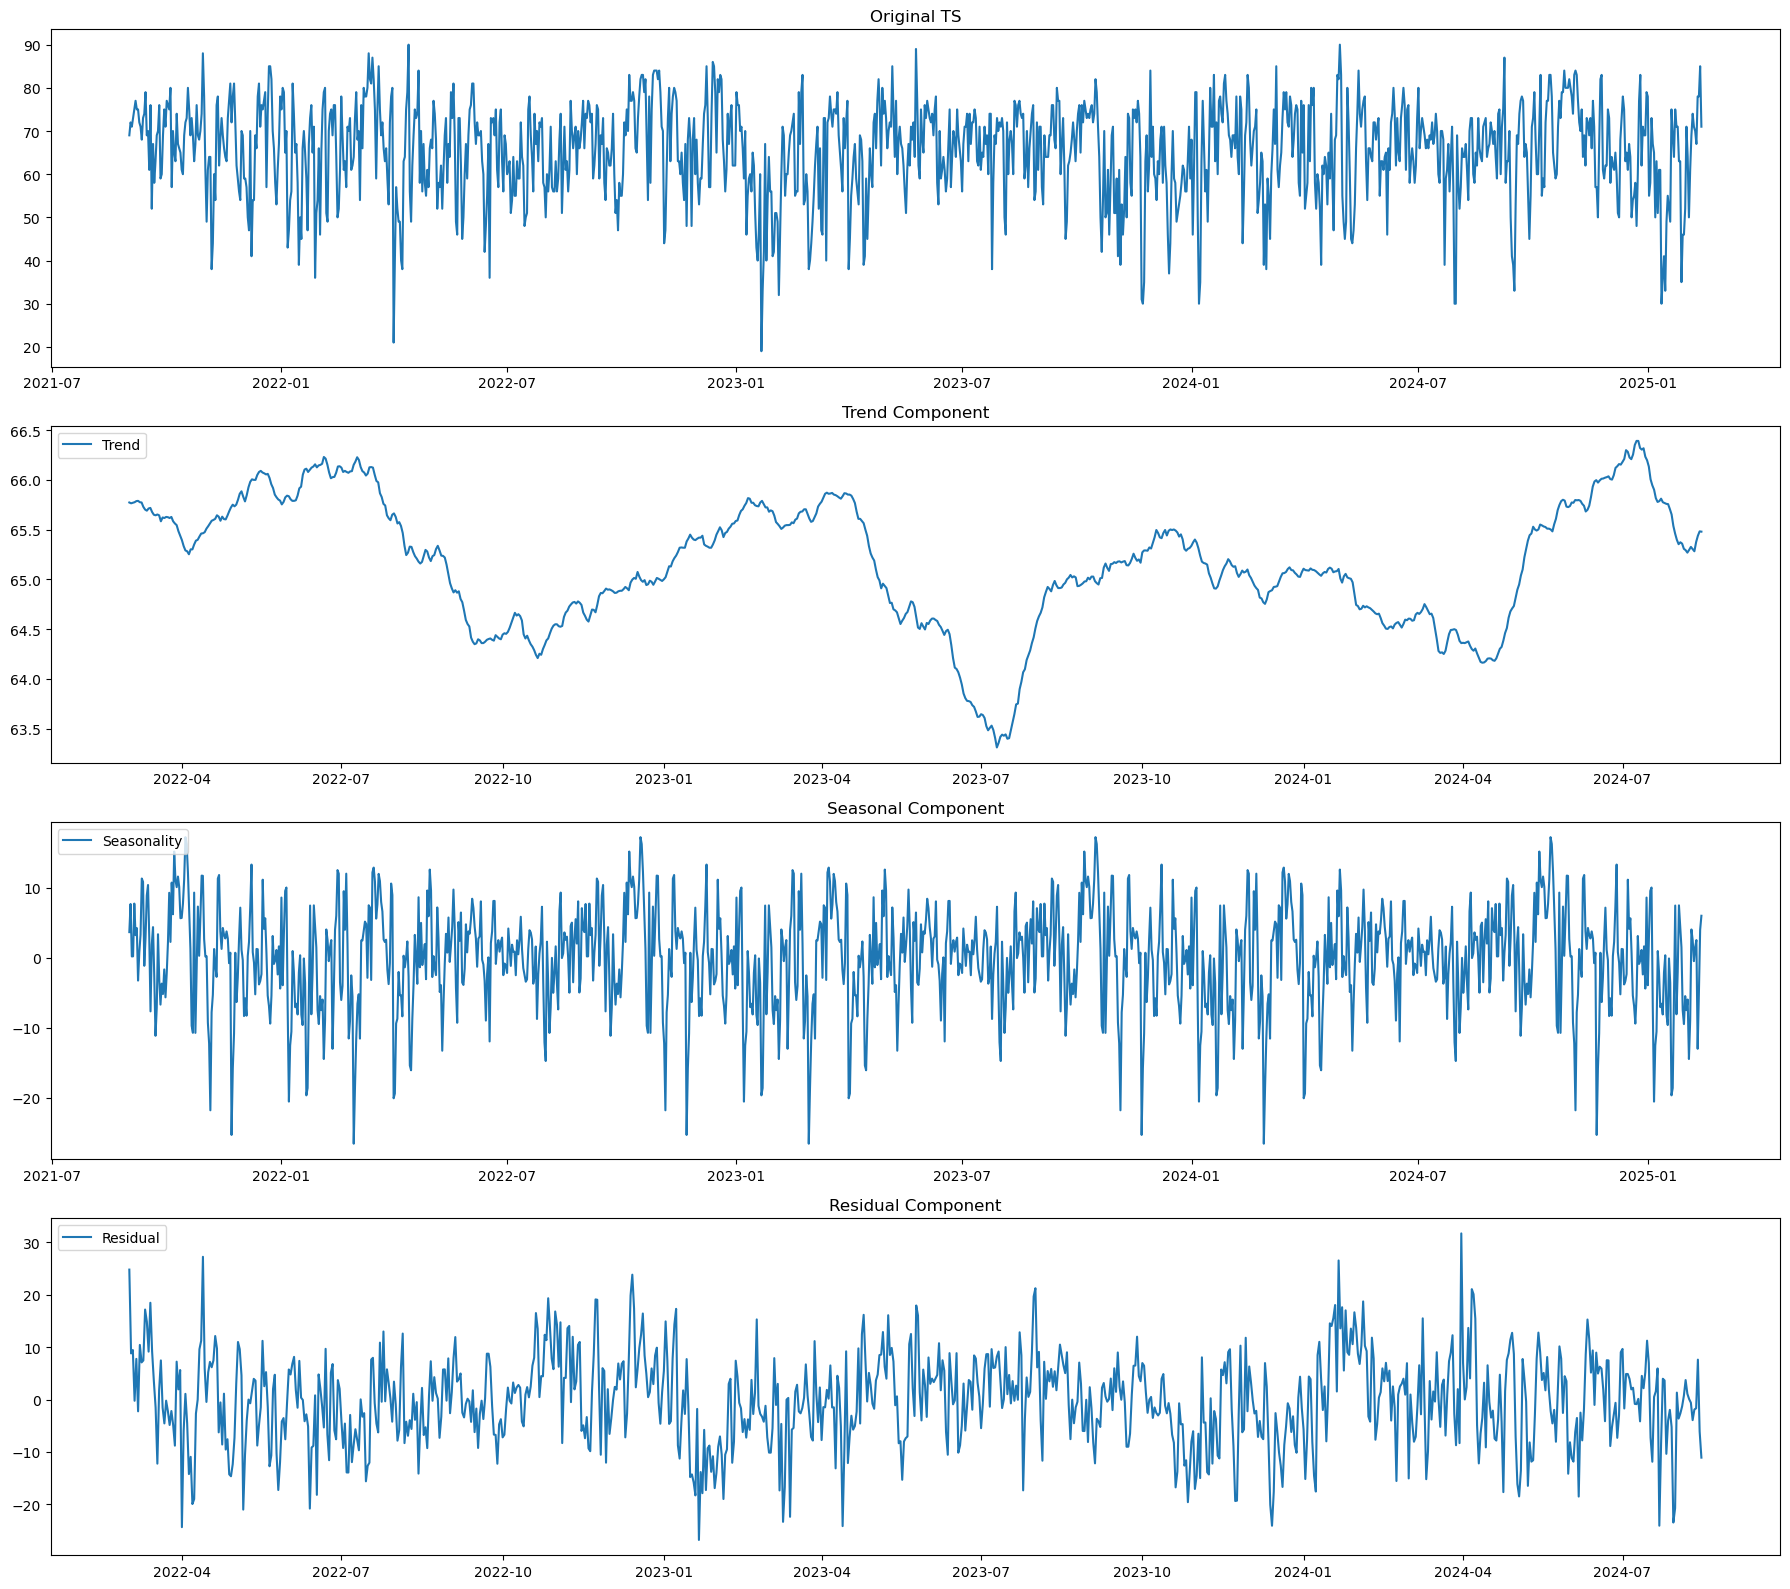

In [66]:
decomposition_air = seasonal_decompose(df_bar['hrMedia'], model='additive', period=365)

plt.figure(figsize=(18, 16))

plt.subplot(4, 1, 1)
plt.plot(df_bar["fecha"], df_bar["hrMedia"])
plt.title('Original TS')

plt.subplot(4, 1, 2)
plt.plot(df_bar["fecha"], decomposition_air.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(df_bar["fecha"], decomposition_air.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(df_bar["fecha"], decomposition_air.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [69]:
window = 30  # 30 days window
threshold = 3  # Threshold of 2 standard deviations

ma = df_bar["hrMedia"].rolling(window=window, center=True).mean()
std = df_bar["hrMedia"].rolling(window=window, center=True).std()

#Treshold min and max
threshold_min = ma - std*threshold 
threshold_max = ma + std*threshold 

#Outliers detection
df_bar["outlier_ma"] = (np.abs(df_bar["hrMedia"] - ma) > threshold * std)

In [70]:
df_bar["outlier_ma"].value_counts()

outlier_ma
False    1261
True        1
Name: count, dtype: int64

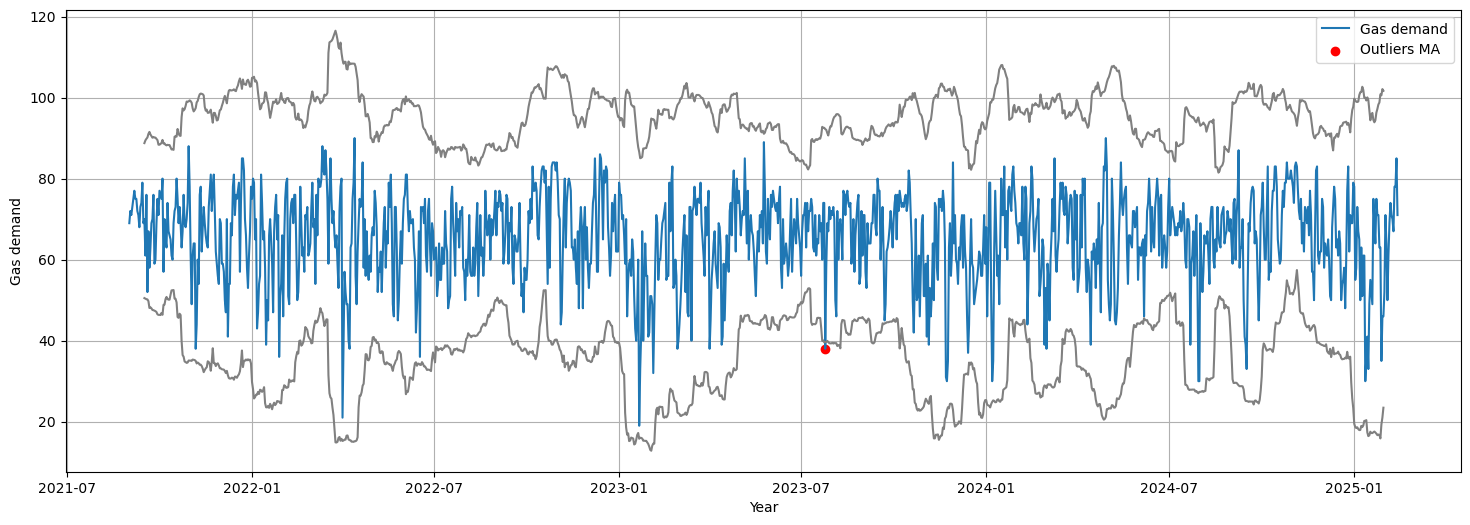

In [72]:
plt.figure(figsize=(18, 6))

plt.plot(df_bar['fecha'], df_bar['hrMedia'], label='Gas demand')
plt.plot(df_bar['fecha'], threshold_min, color='gray')
plt.plot(df_bar['fecha'], threshold_max, color='gray')
plt.scatter(df_bar["fecha"][df_bar["outlier_ma"]], df_bar["hrMedia"][df_bar["outlier_ma"]], color='red', label="Outliers MA")
plt.xlabel('Year')
plt.ylabel('Gas demand')
plt.legend()
plt.grid(True)
plt.show()

## Sacamos la matriz de correlación de los datos actuales de Humedad con sus ultimos 3 dias y los datos del año anterior


In [73]:
df_bar['hrMedia_lag_1'] = df_bar['hrMedia'].shift(1)
df_bar['hrMedia_lag_2'] = df_bar['hrMedia'].shift(2)
df_bar['hrMedia_lag_3'] = df_bar['hrMedia'].shift(3)
df_bar['hrMedia_lag_365'] = df_bar['hrMedia'].shift(365)
df_bar['hrMedia_lag_366'] = df_bar['hrMedia'].shift(366)
df_bar['hrMedia_lag_367'] = df_bar['hrMedia'].shift(367)

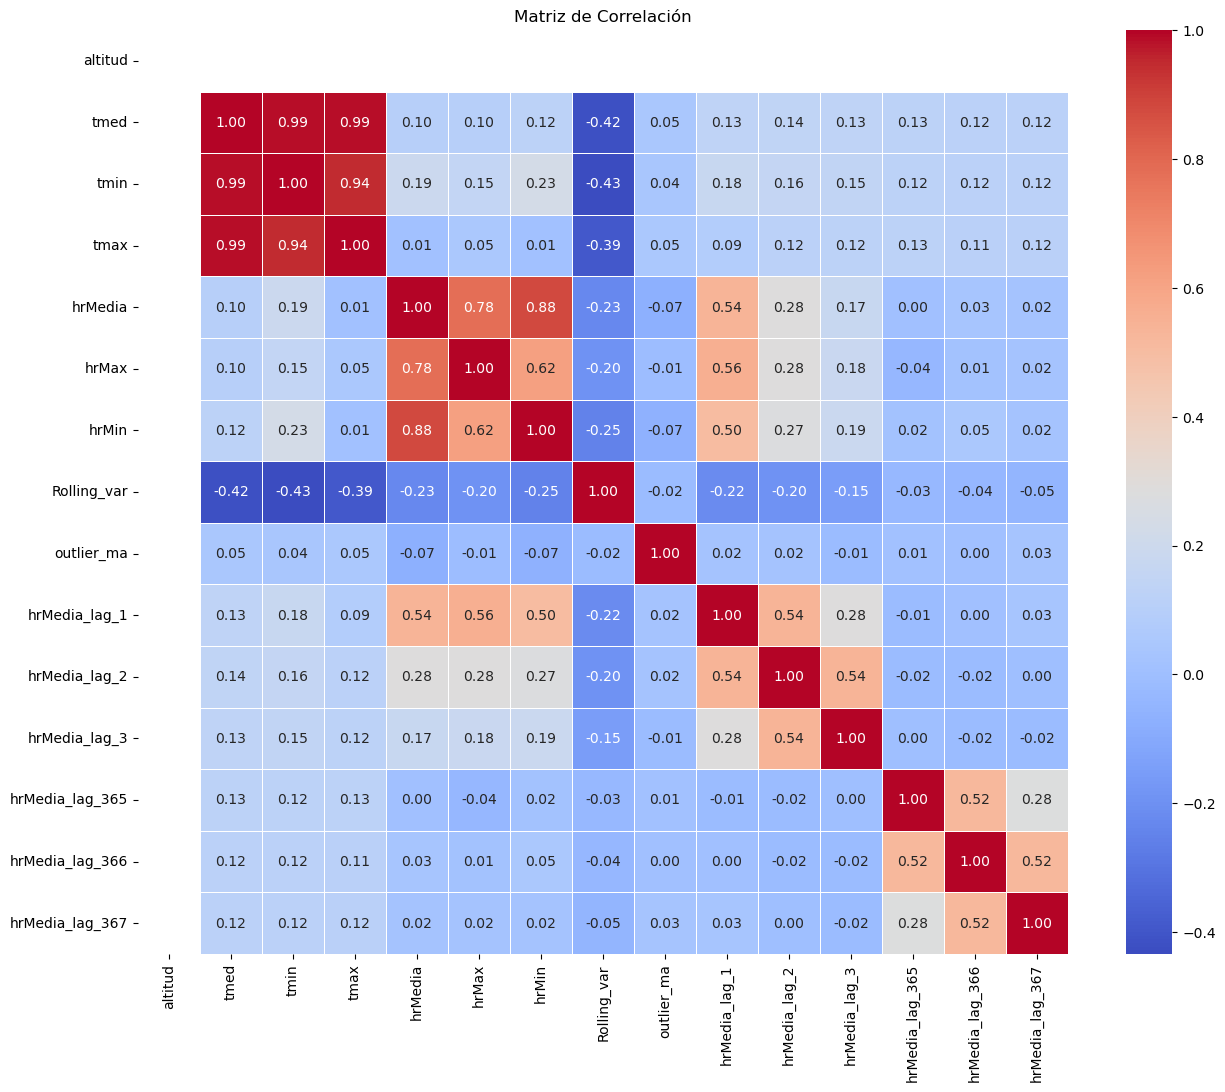

In [74]:
corr_matrix = df_bar.corr(numeric_only=True)

# Crear el mapa de calor
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')

plt.show()

### Como se puede apreciar, tanto con los datos de los 3 días anteriores como los del año pasado la variable tiene una correlación casi nula.

## Medimos la estacionalidad de la time series de Humedad relativa

In [75]:
check_stationarity(df_mad['hrMedia'], 'hrMedia')

ADF Statistic for hrMedia: -4.587736617517757
p-value: 0.00013606203385745484
The series is likely stationary.


In [76]:
check_stationarity(df_bar['hrMedia'], 'hrMedia')

ADF Statistic for hrMedia: -12.687396922824853
p-value: 1.1516790061477908e-23
The series is likely stationary.


In [77]:
check_stationarity(df_hoyo['relative_humidity_2m'], 'relative_humidity_2m')

ADF Statistic for relative_humidity_2m: -3.8407549393543117
p-value: 0.002516806780882423
The series is likely stationary.
